# Exploratory Data Analysis - Spotify Music Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys
sys.path.append('../src')
from preprocessing import load_data, clean_data

In [2]:
df_raw = load_data('../data/spotify_2000.csv')
print('Raw data shape:', df_raw.shape)
df_raw.head()

Raw data shape: (2002, 18)


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493.0,False,2000,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560.0,False,2000,65.0,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
print('Raw data info:')
print(df_raw.info())
print('\nMissing values:')
print(df_raw.isnull().sum())

Raw data info:
<class 'pandas.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   str    
 1   song              2000 non-null   str    
 2   duration_ms       2000 non-null   float64
 3   explicit          2000 non-null   object 
 4   year              2002 non-null   int64  
 5   popularity        2000 non-null   float64
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   float64
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   float64
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   floa

In [4]:
df = clean_data(df_raw)
print('Cleaned data shape:', df.shape)
df.head()

Cleaned data shape: (2000, 5)


,primary_genre,popularity,danceability,energy,tempo
0,pop,77.0,0.751,0.834,95.053
1,rock,79.0,0.434,0.897,148.726
2,pop,66.0,0.529,0.496,136.859
3,rock,78.0,0.551,0.913,119.992
4,pop,65.0,0.614,0.928,172.656


In [5]:
print('\nDescriptive Statistics:')
print(df.describe())


Descriptive Statistics:
        popularity  danceability       energy        tempo
count  2000.000000   2000.000000  2000.000000  2000.000000
mean     59.872500      0.667438     0.720366   120.122558
std      21.335577      0.140416     0.152745    26.967112
min       0.000000      0.129000     0.054900    60.019000
25%      56.000000      0.581000     0.622000    98.985750
50%      65.500000      0.676000     0.736000   120.021500
75%      73.000000      0.764000     0.839000   134.265500
max      89.000000      0.975000     0.999000   210.851000


In [6]:
genre_stats = df.groupby('primary_genre').agg({
    'popularity': ['count', 'mean', 'std']
}).round(2)
genre_stats.columns = ['count', 'mean_popularity', 'sd_popularity']
genre_stats = genre_stats.sort_values('count', ascending=False)
print('\nGenre Summary Statistics:')
print(genre_stats)


Genre Summary Statistics:
                   count  mean_popularity  sd_popularity
primary_genre                                           
pop                  936            57.47          23.02
hip hop              776            61.99          19.26
rock                 162            66.19          18.92
Dance/Electronic      41            51.76          19.62
set()                 22            57.45          13.99
latin                 15            62.40          24.69
R&B                   13            60.46          20.27
country               11            48.18          24.70
World/Traditional     10            53.80          21.35
metal                  9            72.00           5.87
Folk/Acoustic          4            56.00          37.71
easy listening         1            72.00            NaN


In [7]:
pop = df['popularity']
print(f'Mean: {pop.mean():.2f}')
print(f'Median: {pop.median():.2f}')
print(f'Variance: {pop.var():.2f}')
print(f'Std Dev: {pop.std():.2f}')
print(f'Range: {pop.min():.0f} - {pop.max():.0f}')
print(f'IQR: {pop.quantile(0.75) - pop.quantile(0.25):.2f}')

Mean: 59.87
Median: 65.50
Variance: 455.21
Std Dev: 21.34
Range: 0 - 89
IQR: 17.00


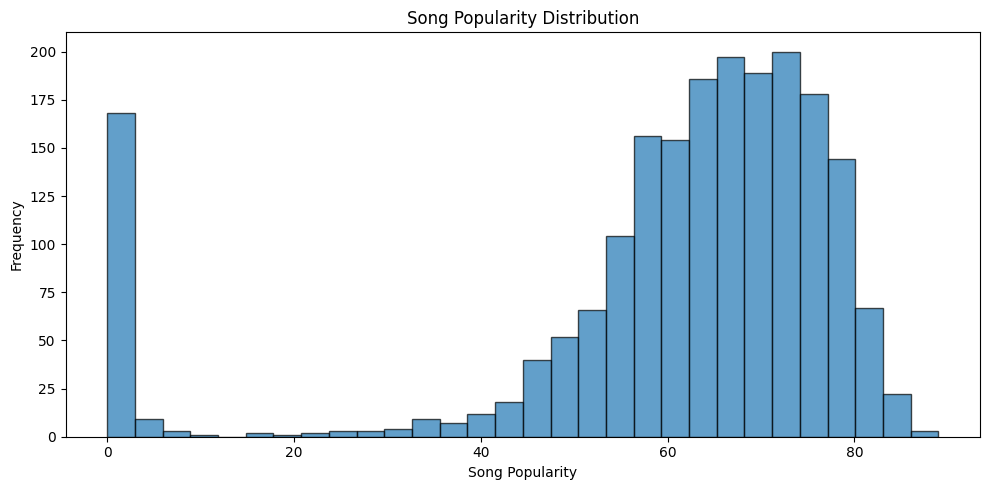

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df['popularity'], bins=30, edgecolor='black', alpha=0.7)
ax.set_xlabel('Song Popularity')
ax.set_ylabel('Frequency')
ax.set_title('Song Popularity Distribution')
plt.tight_layout()
plt.show()

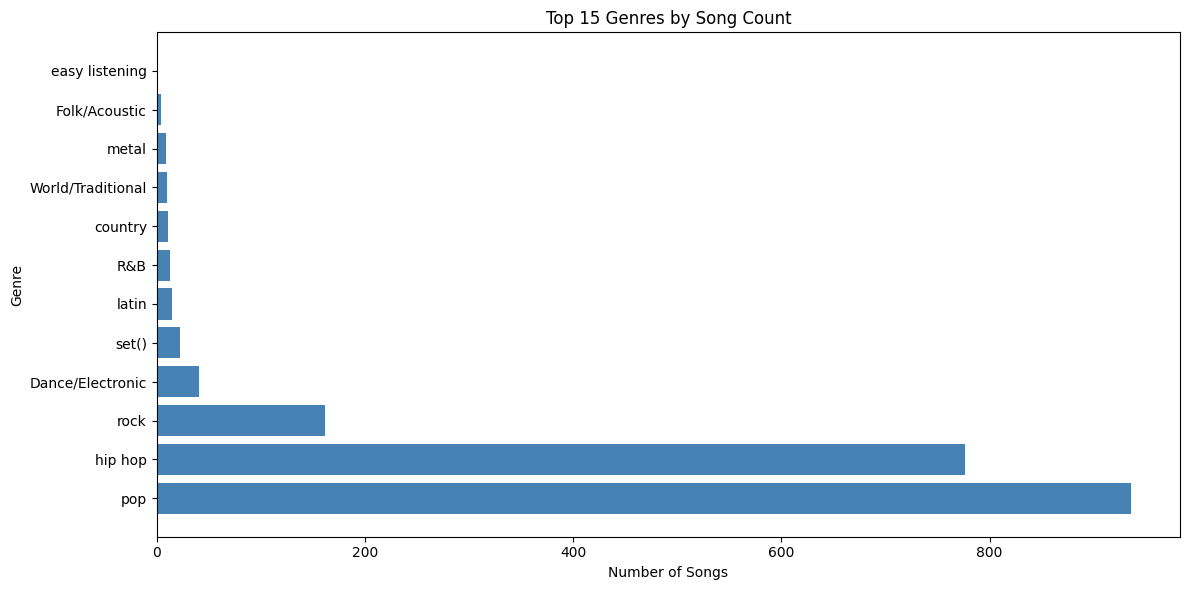

In [9]:
genre_counts = df['primary_genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(genre_counts['genre'][:15], genre_counts['count'][:15], color='steelblue')
ax.set_xlabel('Number of Songs')
ax.set_ylabel('Genre')
ax.set_title('Top 15 Genres by Song Count')
plt.tight_layout()
plt.show()

In [10]:
corr_features = ['popularity', 'danceability', 'energy']
corr_matrix = df[corr_features].corr()
print('\nCorrelation Matrix:')
print(corr_matrix)


Correlation Matrix:
              popularity  danceability    energy
popularity      1.000000     -0.003546 -0.014021
danceability   -0.003546      1.000000 -0.104038
energy         -0.014021     -0.104038  1.000000


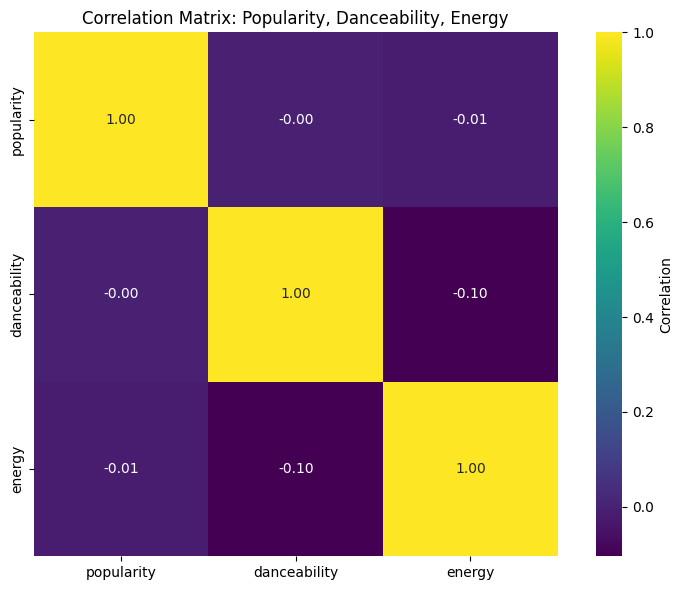

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', ax=ax, 
            square=True, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlation Matrix: Popularity, Danceability, Energy')
plt.tight_layout()
plt.show()

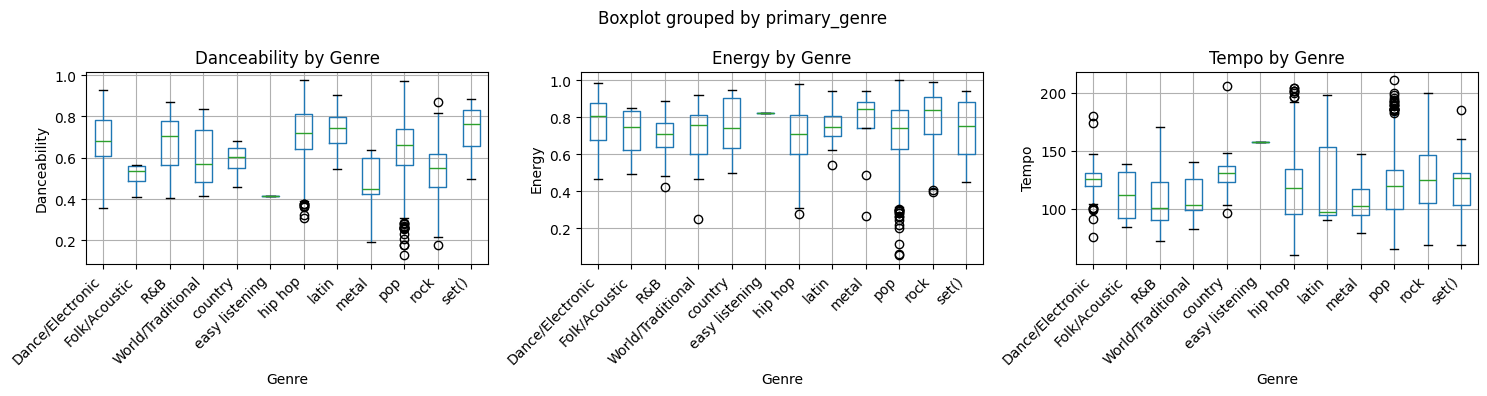

In [12]:
features = ['danceability', 'energy', 'tempo']
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, feature in enumerate(features):
    ax = axes[idx]
    df.boxplot(column=feature, by='primary_genre', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'{feature.capitalize()} by Genre')
    ax.set_xlabel('Genre')
    ax.set_ylabel(feature.capitalize())
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()